# Keeling graph

This notebook process the data for the Uniview Keeling Curve module, the atmospheric concentration of carbon dioxide over time. The curve is named after atmospheric scientist Charles David Keeling. It utilizes data from NOAA's https://www.esrl.noaa.gov/gmd/dv/iadv/graph.php?code=MLO&program=ccgg&type=ts> Earth Systems Research Laboratory collected from their Mauna Loa Observatory. 

In [11]:
from astropy.io import ascii
from PIL import Image
import numpy as np

In [4]:
co2Table = ascii.read('co2_mlo_surface-insitu_1_ccgg_MonthlyData.txt')
co2Table

col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,col11,col12,col13,col14,col15,col16,col17
str3,int32,int32,int32,int32,int32,int32,float64,float64,int32,float64,float64,float64,float64,float64,str2,str3
MLO,1974,1,1,0,0,0,-999.99,-99.99,0,19.536,-155.576,3437.0,3397.0,40.0,NA,*..
MLO,1974,2,1,0,0,0,-999.99,-99.99,0,19.536,-155.576,3437.0,3397.0,40.0,NA,*..
MLO,1974,3,1,0,0,0,-999.99,-99.99,0,19.536,-155.576,3437.0,3397.0,40.0,NA,*..
MLO,1974,4,1,0,0,0,-999.99,-99.99,0,19.536,-155.576,3437.0,3397.0,40.0,NA,*..
MLO,1974,5,1,0,0,0,333.157,0.286,15,19.536,-155.576,3437.0,3397.0,40.0,NA,...
MLO,1974,6,1,0,0,0,332.059,0.317,27,19.536,-155.576,3437.0,3397.0,40.0,NA,...
MLO,1974,7,1,0,0,0,330.988,0.505,31,19.536,-155.576,3437.0,3397.0,40.0,NA,...
MLO,1974,8,1,0,0,0,329.165,0.659,31,19.536,-155.576,3437.0,3397.0,40.0,NA,...
MLO,1974,9,1,0,0,0,327.407,0.548,29,19.536,-155.576,3437.0,3397.0,40.0,NA,...


In [4]:
yearCol=co2Table['col2']+(co2Table['col3']-1.0)/12.

## Plot Data

In [30]:
#initalize plotting
%config InlineBackend.rc = {}
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

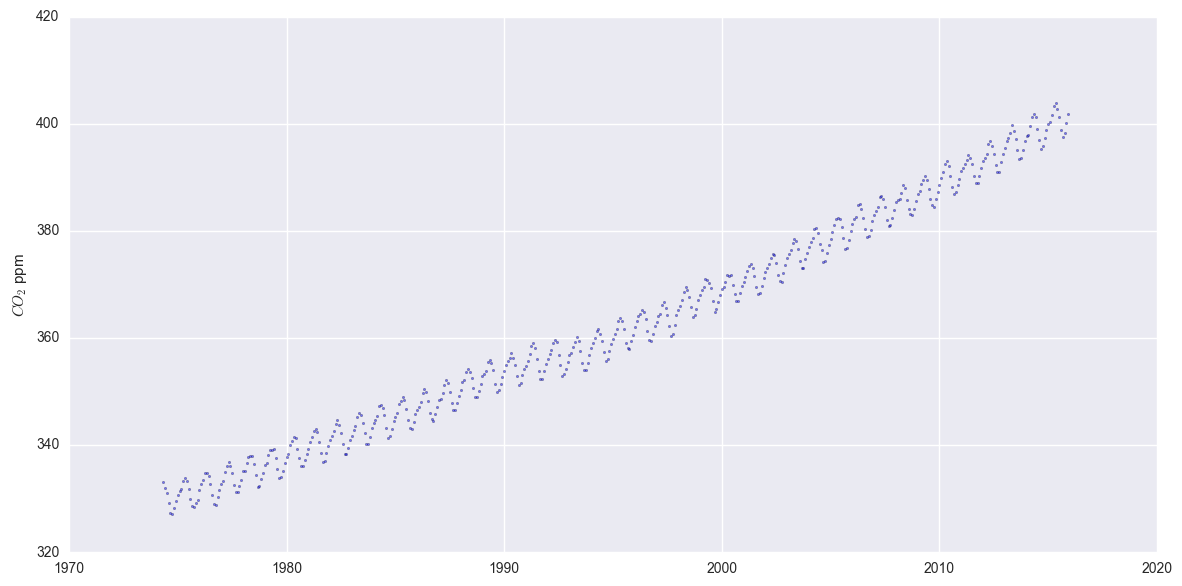

In [75]:
sns.set_style(style='darkgrid')
plt.figure(figsize=(12,6))
plt.ylabel(r'$CO_2$ ppm')
plt.scatter(yearCol, co2Table['col8'],s=3,alpha=0.5)
plt.ylim(320,420)
#plt.xlim(1976,2017)
plt.tight_layout()
plt.savefig('graph.png')

## Encode data to texture

In [76]:
504/12

42.0

In [6]:
co2Texture = Image.new("RGB",(42,12))

In [9]:
for monthData in co2Table:
    iYear = monthData['col2']-1974
    iMonth = monthData['col3']-1
    valR=max(0,int(np.floor(monthData['col8'])-300))
    valG=int(256.0*(monthData['col8']-np.floor(monthData['col8'])))
    co2Texture.putpixel((iYear,iMonth),(valR,valG,0))

In [10]:
co2Texture.save('co2_mlo_surface-insitu_1_ccgg_MonthlyData.png')

In [12]:
co2Texture